<h1> Welcome to the 2D fourier programming problem set for PE2!</h1>
<br>
This programming problem set will recapitulate on 1D Fourier transforms but will mostly be about 2D Fourier transforms, convolutions and some <b>physical and astronomical</b> implementations. Make sure to describe in markdown cells what you see and understand, and more importantly, an <b>analysis and a discussion</b> of the results you find. What happens? Is my result reasonable? What does this implicate? Etc?!
<br>

<br>
In the PE1 practicals and in different courses you have gained quite some experience with 1D Fourier transforms and with Fourier series. In PE1 we have used these to make the Fourier transform of both simple sine waves and more complex signals. It turned out that this was useful in eliminating noise, in characterizing signals, etc. We have seen that we can transform any discrete or continuous signal into a function in the Fourier domain. <br><br>
Fourier transforms can be easily generalized to more dimensions. In the 1D case, we considered t-, or x-coordinates in the time / space domain and $\omega$, or k frequency coordinates in the frequency / Fourier domain. For 2D Fourier transformations, we have comparable conventions. In the space domain, we consider (x,y)-coordinates, whereas the Fourier domain is represented by (u,v)-coordinates.<br><br>
It is appropriate to first define some formalisms. Recall that the 1D fourier transform is given by<br>
$$\large{\pmb{\mathscr{F}(\omega) =  \int f(x) e^{-i \omega x}\mathrm{dx}}}$$
where $x$ can be any variable, and $\omega$ is its respective angular frequency. 
Now the definition of the fourier transformation is done continiously, but whenever you wish to convert 
from the real world to the digital domain, one has to discretize the signal. This can be done by multiplying
your function by a Dirac Comb function, consisting of delta peaks; these resemble the moments you measure. And then applying
a window to these signals, since one cannot measure for a infinetely long time. 
The Discrete Fourier Transform is the transformation most commonly used to look at measurements in the frequency domain. By continuing a signal by repeating it periodically your frequency becomes discrete. We get a combination of the Fourier Series and the Discrete Time Fourier Transform. We will use the conventional definition, where we transform a list of numbers $x[n]$ with $n=0,1,...,N-1$ into $X[k]$ met $k = 0,1,...,N-1$:
$$
\begin{align}
X[k]&=\sum_{n=0}^{N-1} x[n] e^{-i 2\pi k \frac{n}{N}} \,, \\
x[n]&=\frac{1}{N} \sum_{k=0}^{N-1} X[k] e^{i 2\pi k \frac{n}{N}} \,.
\end{align}
$$
You can convert $X[k]$ into $X[\omega]$ by substituting $k=\omega T/2\pi$ where $T$ is the time associated with $x[N-1]$. This ensures that you maintain a one-to-one relationship with the Fourier Transform. 

For more practical notes on the implemenation and usage of the fast fourier transform package in Numpy see [this source](https://docs.scipy.org/doc/numpy/reference/routines.fft.html)
<br>



An equivalent transform in the 2D case is given by
$$\large{\pmb{\mathscr{F}(u,v) = \int f(x,y) e^{-i (ux + vy)}\mathrm{dxdy}}}$$
<br><br>
To get used to the idea of 2D Fourier transforms, a few examples will be given for functions both in 1D and in 2D space.<br>



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from scipy import signal

<h3>Chapter 1: 1D Fourier transform recap</h3>
We start by studying the Fourier transform of a Gaussian by varying the width (and thus the height) of the given Gaussian function. Complete the code so that we are also able to plot the Fourier transform of the gaussian. Note that the lineplot will look a bit weird. We can alleviate this by shifting the FT so that the zero-frequency is in the center of the arrays that we plot, like we expect. We shift the FT by using the fftshift and ifftshift functions. If you're unsure what exactly happens: read the documentation of the fft functions (especially the fft and fftshift functions).

As of now, the gaussian window is defined within -T/2, T/2. You can of course also change this to increase or decrease the width of the function.
You can play around with other functions as well (e.g. a square or triangle window).</h3>
In short, do the following:  

1. play around with the gaussian, different widths  
2. read the [documentation](https://docs.scipy.org/doc/numpy/reference/routines.fft.html) about the numpy fft functions  
3. fourier transform it, see what it looks like (What is the FT of a gaussian supposed to look like?)  
4. correctly use the fftshift and ifftshift functions, is this the FT of a gaussian?  
5. correctly define your frequency axis and shift it properly  
6. try to reconstruct your time signal using the ifft functions
7. how does the window width influence the FT of the window? Can you find a relation?

Note: the 2nd and 3rd plot are turned off by default: remove '#' when ready

c:\Users\masla\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


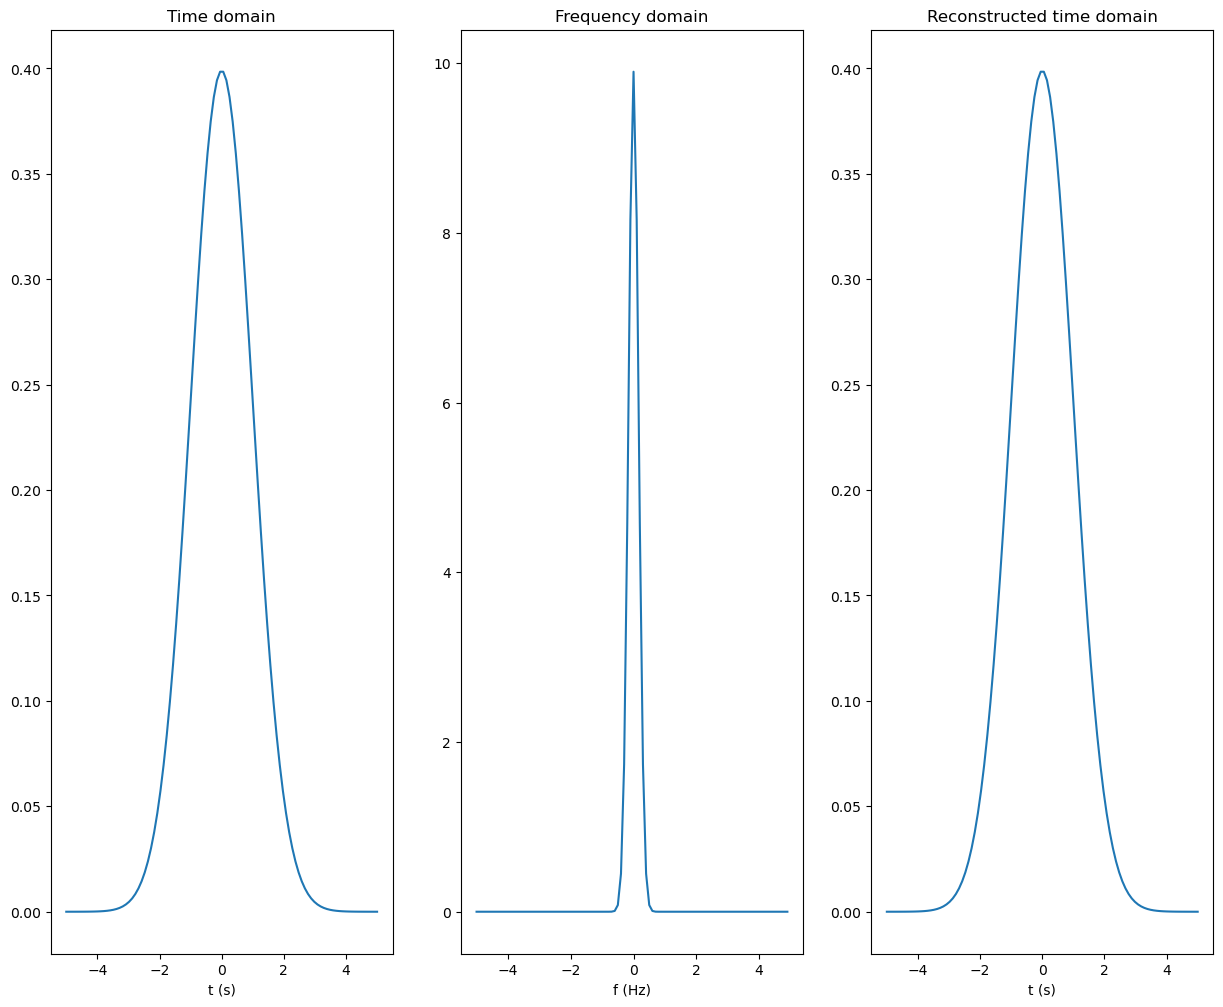

In [4]:
# Define some function data
timestep = 0.1
T = 10
x_sample = np.linspace(-T/2, T/2, int(T/timestep))
#define the gaussian function
rv = scipy.stats.norm(loc = 0., scale = 1)
y_sample = rv.pdf(x_sample)

"""open part for the student"""
# Calculate the fourier transform and also the frequency axis
freq = np.fft.fftfreq(len(x_sample), d=timestep)
fft_y = np.fft.fft(y_sample)
# Shift the FT correctly using the fftshift functions
freq = np.fft.fftshift(freq)
fft_y = np.fft.fftshift(fft_y)
# transform back the signal (remember to shift the FT back first using ifftshift!) 
y_shiftback = np.fft.ifftshift(fft_y)
y_reconstructed = np.fft.ifft(y_shiftback)
"""end"""

plt.figure(figsize=(15,12))

# subplot 1 in the time domain
plt.subplot(131)
plt.title("Time domain")
plt.plot(x_sample, y_sample)
plt.xlabel("t (s)")

# subplot 2 in the frequency domain
plt.subplot(132)
plt.plot(freq, np.abs(fft_y))
plt.title("Frequency domain")
plt.xlabel("f (Hz)")

# subplot 3 in the reconstructed time domain
plt.subplot(133)
plt.plot(x_sample,y_reconstructed)
plt.title("Reconstructed time domain")
plt.xlabel("t (s)")
plt.show()

<h5>Recall that a wider Gaussian in time domain yields a more narrow Gaussian in the frequency domain.<BR>
Also recall what the Fourier transform of a window in time looks like.</h5>

<h3>Chapter 2: 2D Fourier transform</h3>

Now we will start writing code for performing a 2D Fourier transform. Usually when looking at a  picture, we define the origin (0,0) to be in the middle of the picture. When making a plot, this is not the case by default, so we need to shift the (x,y) arrays before we take the Fourier transform. Afterwards we need to shift the FT back before plotting it.

In [5]:
# The code below performs a 2D fourier transform using optical conventions (k=0 at center)
def fourier_2d(array):
    # For the fourier transform, we first need to shift the k=0 value to the center of the image. 
    # By default the k=0 value is shown at the top left of the image. 
    # In an optical system the k=0 value ends up at the center of the image.
    
    """open part for the student"""
    # shift
    array_shift = np.fft.fftshift(array)
    
    # Do the 2-dimensional fourier transform (2D! so don't use the 1D FT np.fft.fft)
    fourier = np.fft.fft2(array_shift)
    # And shift back
    fourier = np.fft.ifftshift(fourier)
    
    """end"""
    
    return fourier

def inverse_fourier_2d(array):
    # For the fourier transform, we first need to shift the k=0 value to the center of the image. 
    # By default the k=0 value is shown at the top left of the image. 
    # In an optical system the k=0 value ends up at the center of the image.
    
    """open part for the student"""
    # shift 
    array_shift = np.fft.fftshift(array)
    
    # Do the 2-dimensional fourier transform (2D! so don't use the 1D FT np.fft.fft)
    inverse_fourier = np.fft.ifft2(array_shift)
    # And shift back
    inverse_fourier = np.fft.ifftshift(inverse_fourier)
    
    """end"""
    
    return inverse_fourier

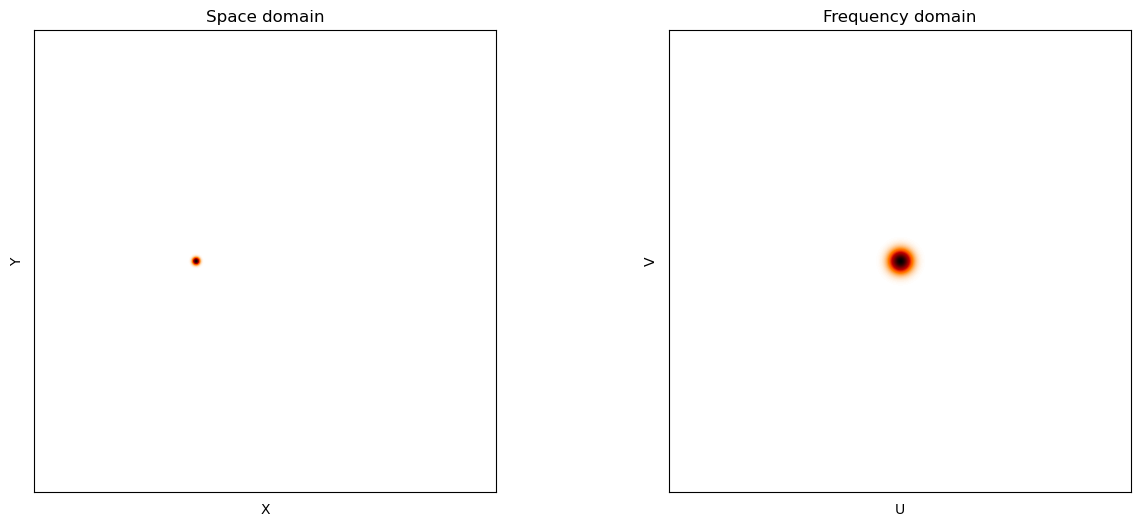

In [6]:
# Now let's look at the 2D equivalent of this. 
# We use an equally shaped Gaussian in both (x,y) dimensions. 
# Therefore, both mu's are zero and both STD's are equal
plt.figure(figsize=(15,6))
# generating the gaussian functions
mu = 3
sigma = 0.1
x = np.arange(-10, 10, 0.01)
y = np.arange(-10, 10, 0.01)
xx, yy = np.meshgrid(x, y, sparse=True)
z = 1/(2*np.pi*sigma**2) * np.exp(-((xx+mu)**2+yy**2)/(2*sigma**2))
# plot in real space
plt.subplot(121)
plt.imshow(z, aspect='equal', cmap='gist_heat_r')
plt.title("Space domain")
plt.xlabel('X')
plt.xticks([])
plt.yticks([])
plt.ylabel('Y')
plt.subplot(122)

# Now we calculate the 2D(!) Fourier transform
z_fft = fourier_2d(z)
# plot in fourier space
plt.imshow(np.abs(z_fft), aspect='equal', cmap='gist_heat_r')
plt.title("Frequency domain")
plt.xlabel('U')
plt.ylabel('V')
plt.xticks([])
plt.yticks([])
plt.show()

Now again try to play around with the gaussian by varying its width (changing sigma). Can you again find a relation between the width of the gaussian function in real space versus in fourier space?








<h5>For these kind of functions 3D visualization is more intuitive:</h5>

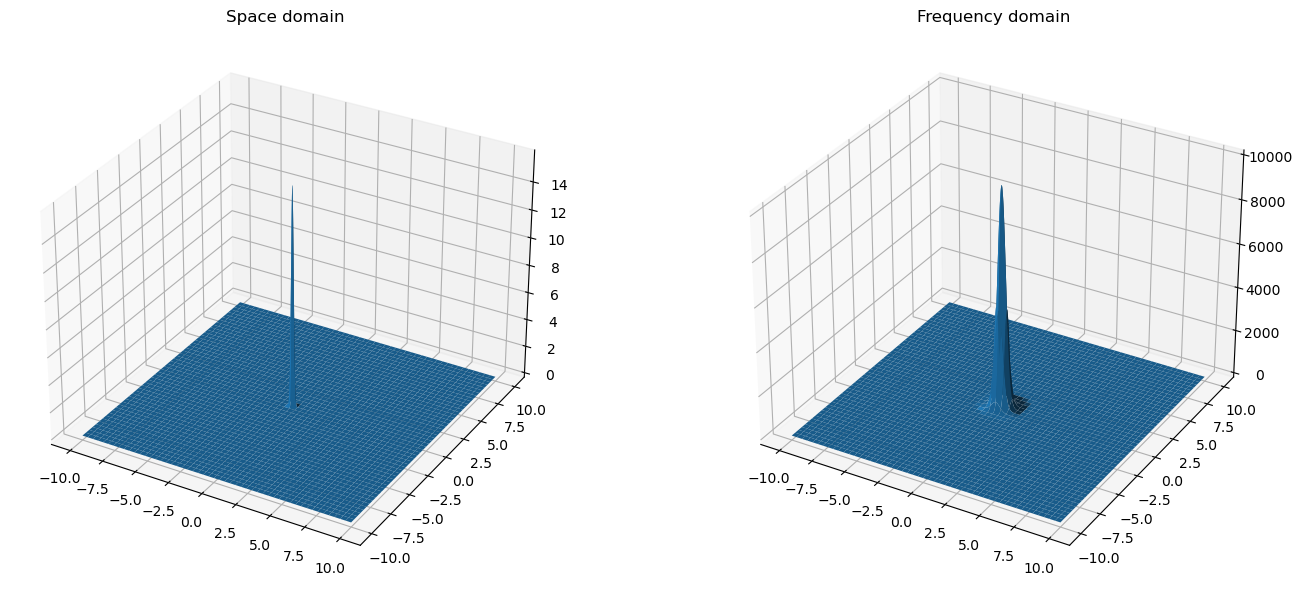

In [7]:
# generating the gaussian:
mu = 0
sigma = 0.1
x = np.arange(-10, 10, 0.01)
y = np.arange(-10, 10, 0.01)
xx, yy = np.meshgrid(x, y, sparse=True)
z = 1/(2*np.pi*sigma**2) * np.exp(-(xx**2+yy**2)/(2*sigma**2))

# 3D plot in real space
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(xx,yy,z)
ax.set_title("Space domain")

# calculating the 2D FT
z_fft = fourier_2d(z)
# 3D plot in fourier space
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(xx,yy,np.abs(z_fft))
ax2.set_title("Frequency domain")
plt.tight_layout()
plt.show()

<h3>2.2 Other functions<BR></h3>We can do the same for one or more functions of your choice. Below the code makes 2D and 3D plots of a function and its FT: sinc/sine/window function. You can of course make your own window function and test it.

<li> How do the properties in the space domain, translate to the frequency domain? Explain this for all three the functions. Try to describe the differences between the three functions and how changing the properties in the space domain (e.g. spatial frequency) influence the properties of its fourier transform.  </li>


Note: you may need to change the space domain properties largely in order to see any differences. You can also change the settings of the plots to make them more clear.

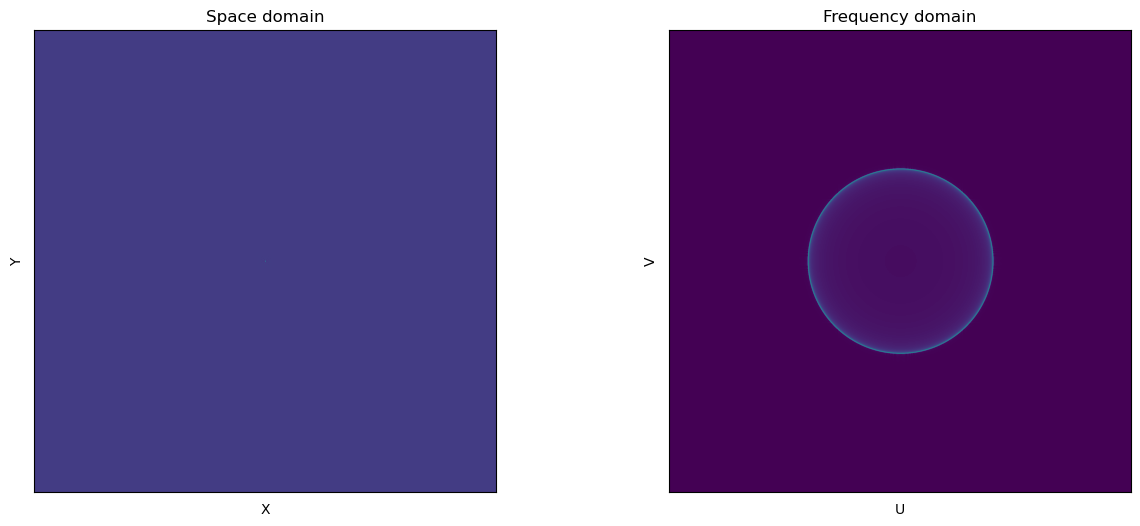

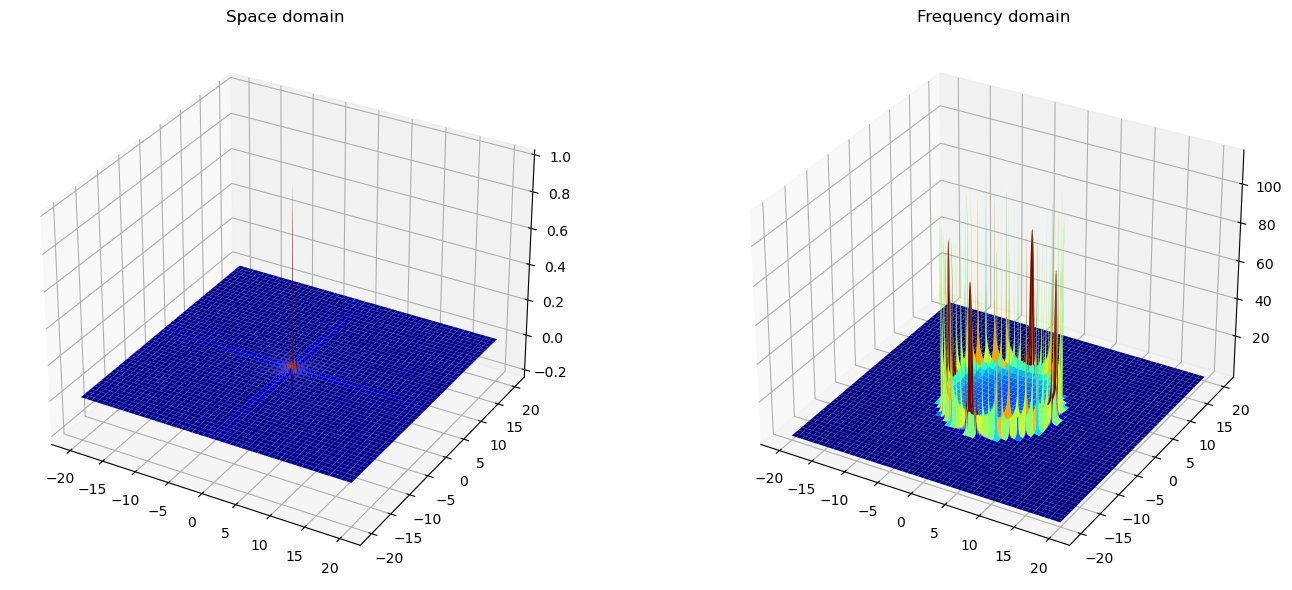

In [8]:
# Possible solution for sinc
from matplotlib import cm
def do_sinc():
    # We first define the sinc function in 2D: sinc(2*pi*f*r) with r**2 = x**2 + y**2
    plt.figure(figsize=(15,6))
    x = np.arange(-20, 20, 0.02)
    y = np.arange(-20, 20, 0.02)
    xx, yy = np.meshgrid(x, y, sparse=True)
    spatial_freq = 10
    r = np.sqrt(xx**2+yy**2)

    # Numpy sinc is safer since it handles divide-by-zero, but
    # is defined as sinc(pi x) / (pi x)
    # z = np.sin(2*np.pi*spatial_freq*r)/(2*np.pi*spatial_freq*r)
    z = np.sinc(2*spatial_freq*r)
    
    plt.subplot(121)
    plt.imshow(z, aspect='equal', cmap='viridis')
    plt.title("Space domain")
    plt.xlabel('X')
    plt.xticks([])
    plt.yticks([])
    plt.ylabel('Y')
    plt.subplot(122)
    # Now we calculate the 2D(!) Fourier transform
    z_fft = fourier_2d(z)
    plt.imshow(np.abs(z_fft), aspect='equal', cmap='viridis')
    plt.title("Frequency domain")
    plt.xlabel('U')
    plt.ylabel('V')
    plt.xticks([])
    plt.yticks([])
    plt.show()


    fig = plt.figure(figsize=(15,6))
    ax = fig.add_subplot(121, projection='3d')
    ax.plot_surface(xx,yy,z,cmap=cm.jet)
    ax.set_title("Space domain")

    z_fft = fourier_2d(z)
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot_surface(xx,yy,np.abs(z_fft),cmap=cm.jet)
    ax2.set_title("Frequency domain")
    plt.tight_layout()
    plt.show()
do_sinc()

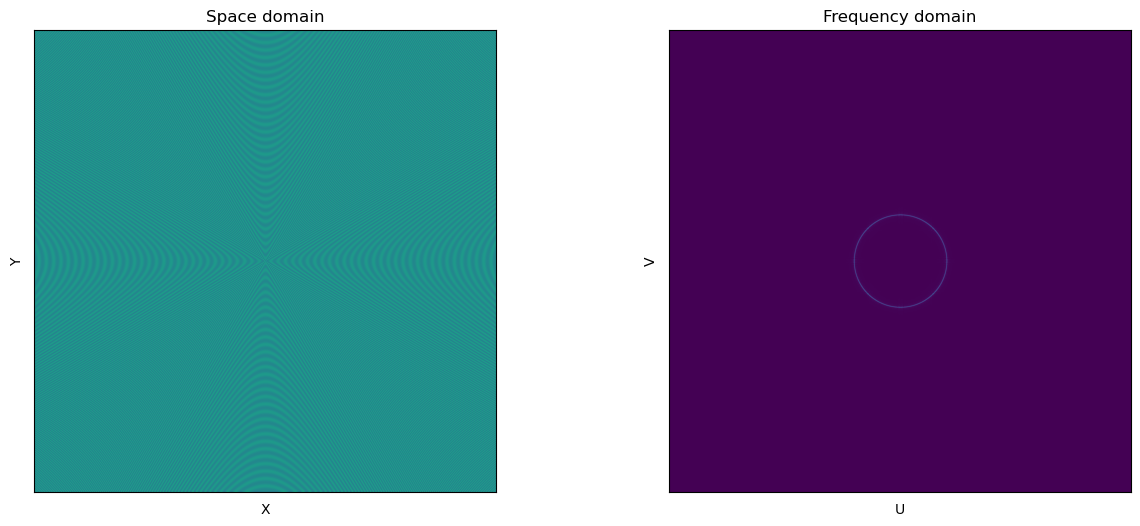

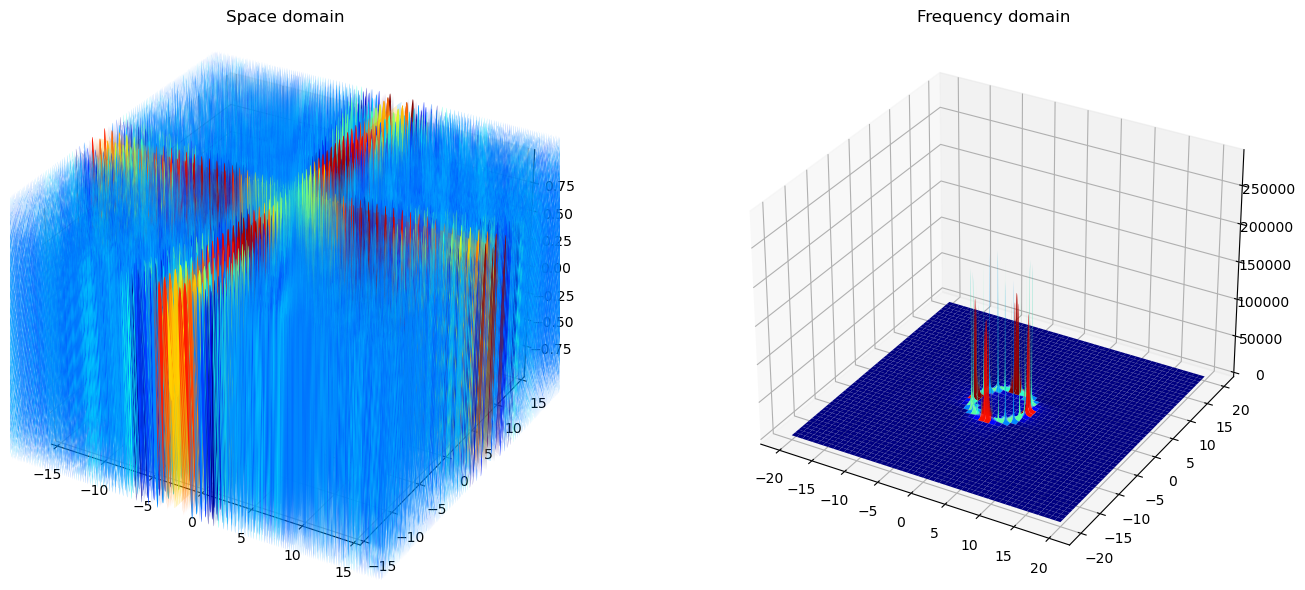

In [9]:
# Possible solution for sine
def do_sine():
    # define the sine function sin(2*pi*f*r) with r**2 = x**2 + y**2
    plt.figure(figsize=(15,6))
    x = np.arange(-20, 20, 0.01)
    y = np.arange(-20, 20, 0.01)
    xx, yy = np.meshgrid(x, y, sparse=True)
    spatial_freq = 10
    r = np.sqrt(xx**2+yy**2)
    z = np.sin(2*np.pi*spatial_freq*r)

    plt.subplot(121)
    plt.imshow(z, aspect='equal', cmap='viridis')
    plt.title("Space domain")
    plt.xlabel('X')
    plt.xticks([])
    plt.yticks([])
    plt.ylabel('Y')
    plt.subplot(122)
    # Now we calculate the 2D(!) Fourier transform
    z_fft = fourier_2d(z)
    plt.imshow(np.abs(z_fft), aspect='equal', cmap='viridis')
    plt.title("Frequency domain")
    plt.xlabel('U')
    plt.ylabel('V')
    plt.xticks([])
    plt.yticks([])
    plt.show()


    fig = plt.figure(figsize=(15,6))
    ax = fig.add_subplot(121, projection='3d')
    ax.plot_surface(xx,yy,z,cmap=cm.jet)
    ax.set_xlim(-15,15)
    ax.set_ylim(-15,15)
    ax.set_title("Space domain")

    z_fft = fourier_2d(z)
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot_surface(xx,yy,np.abs(z_fft),cmap=cm.jet)
    ax2.set_title("Frequency domain")
    plt.tight_layout()
    plt.show()
do_sine()

We get a ring of delta peaks, without the 'one' in the middle like in the sinc

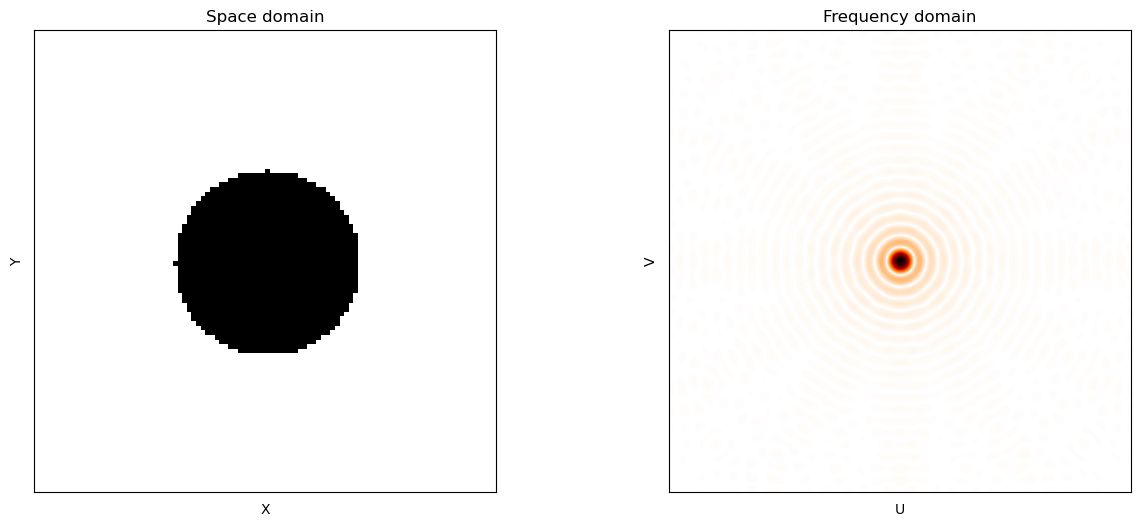

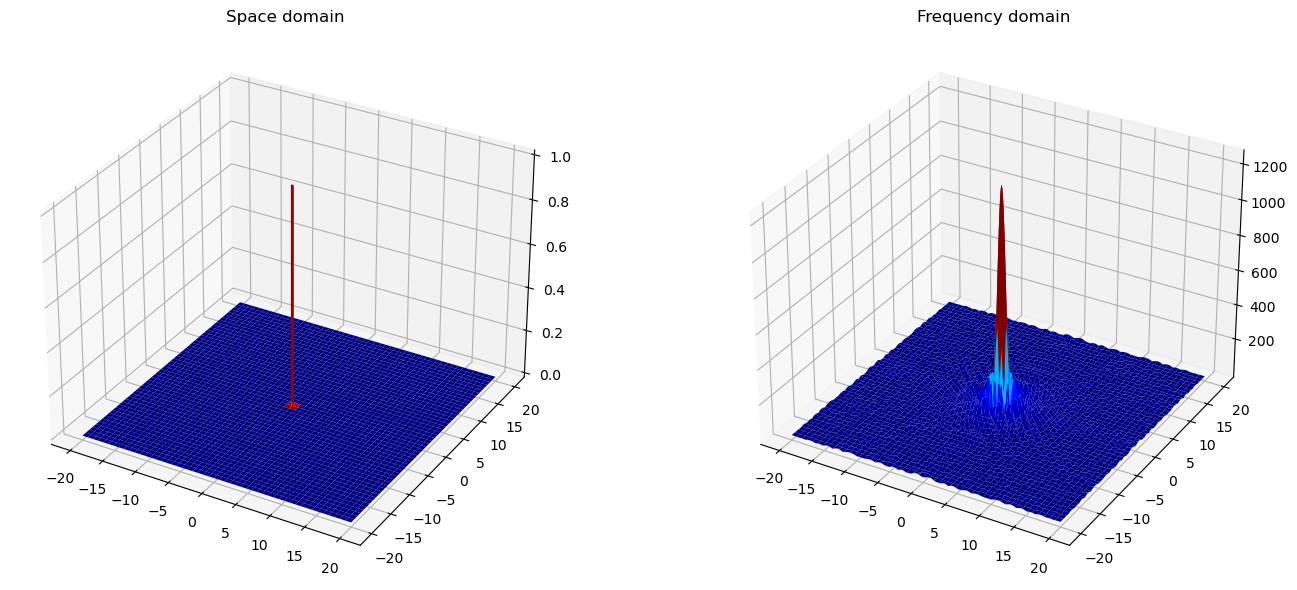

In [10]:
def do_window():
    # define our square window: 1 for r < 0.1; 0 for everywhere else
    plt.figure(figsize=(15,6))
    x = np.arange(-20, 20, 0.01)
    y = np.arange(-20, 20, 0.01)
    xx, yy = np.meshgrid(x, y, sparse=True)
    r = np.sqrt(xx**2+yy**2)
    z = np.where(r<0.2, 1, 0)

    plt.subplot(121)
    plt.imshow(z, aspect='equal', cmap='gist_heat_r',extent=(-20,20,-20,20))
    plt.title("Space domain")
    plt.xlabel('X')
    plt.xticks([])
    plt.yticks([])
    plt.ylabel('Y')
    plt.xlim(-0.5,0.5)
    plt.ylim(-0.5,0.5)
    plt.subplot(122)
    # Now we calculate the 2D(!) Fourier transform
    z_fft = fourier_2d(z)
    plt.imshow(np.abs(z_fft), aspect='equal', cmap='gist_heat_r')
    plt.title("Frequency domain")
    plt.xlabel('U')
    plt.ylabel('V')
    plt.xticks([])
    plt.yticks([])
    plt.show()


    fig = plt.figure(figsize=(15,6))
    ax = fig.add_subplot(121, projection='3d')
    ax.plot_surface(xx,yy,z,cmap=cm.jet)
    ax.set_title("Space domain")

    z_fft = fourier_2d(z)
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot_surface(xx,yy,np.abs(z_fft),cmap=cm.jet)
    ax2.set_title("Frequency domain")
    plt.tight_layout()
    plt.show()
do_window()

We get what is basically the real 2d SINC

<h3>Chapter 3: Research applications I</h3>
<h4>So far the examples. Time for some real work. </h4>
<h5>A few 'real world' applications of 2D Fourier transforms are:<br>
<ul>
    <li>Image analysis</li>
    <li>Optics</li>
    <li>Interferometry in radio astronomy</li>
</ul></h5>

### 3.1 STM image analysis
In this section, we apply the 2D Fourier transform to analyse an image from a scanning tunneling microscope in order to determine the lattice spacing. 

A scanning tunneling microscope (STM) is an instrument for imaging surfaces at the atomic level. In the file `si(100).jpg`, you see an STM image of a silicium surface. The scale of this picture is roughly 50 x 50 nm. The surface shows periodic structures. Furthermore, we can identify two so called terraces in the image. We will use 2D FT analysis to identify these lattices and extract the lattice spacing of a selected terrace.

The first step will be to make a 'mask' that enables us to select a terrace. Using these masks we can selectively perform a 2D FT on a terrace. By analysing the 2D FT we can recover what recurring patterns there are in the image, and thus recover the lattice spacing.

In the code below, we open the image, convert it to grayscale, and plot it. To determine the lattice spacing, follow these steps:

1. Change the mask such that only 1 terrace is visible
2. Take the 2D Fourier transform of the masked image
3. Convert number of pixels to nm (i.e. calculate the sample spacing in nm)
4. Create arrays for the spatial frequencies
5. Inspect the 2D Fourier transform
6. Determine the spatial frequency of the lattice
7. Convert the spatial frequency to lattice spacing

##### Note
The mask you use to select a single terrace will influence the Fourier transform. How can you visualize the contributions of the mask? 

In the above approach, there are many different ways of determining the spatial frequency. One approach, similar to what you have done in the lab before, is looking at where the transform peaks. For this 2D image, this will be difficult. Another approach (although less accurate) would be to determine the spacing in Fourier space by eye, and work from there. A third approach is determining peak locations through trial-and-error, and work from there

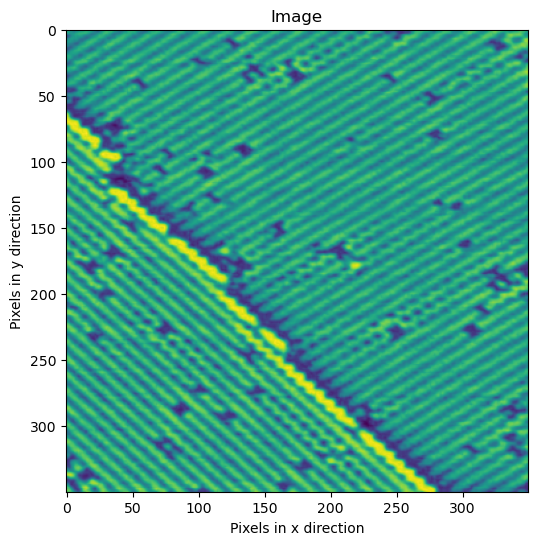

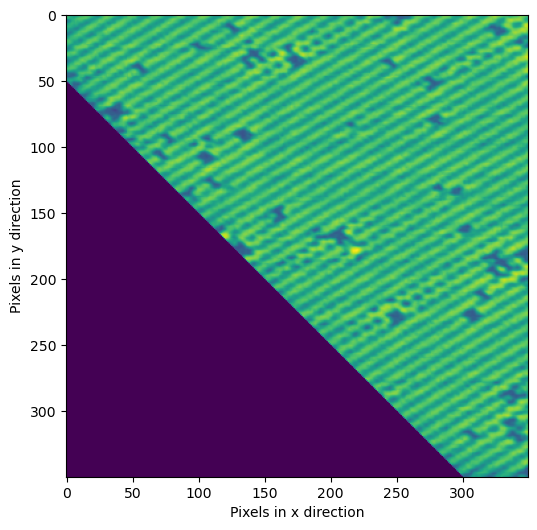

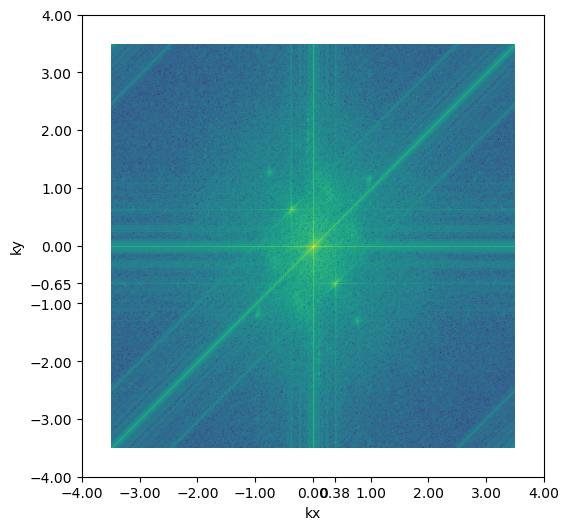

Lattice spacing: 1.328 nm


'\nend\n'

In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

filename = 'si(100).jpg'

#open file
im=Image.open(filename)
im=im.convert('L') #make grayscale
imarray=np.array(im,dtype=np.uint8)

# Plot figure
plt.figure(figsize=(12,6))
plt.imshow(imarray)
plt.title("Image")
plt.xlabel("Pixels in x direction")
plt.ylabel("Pixels in y direction")
plt.show()

# Grab witdh and height of image
width, height = np.shape(imarray)
# Define the center
x0, y0 = width/2, height/2

# Create grid
y,x = np.ogrid[-x0:x0, -y0:y0]

"""
Open part for the student
"""
# Create mask
mask = np.zeros_like(imarray)
mask = np.where(x - y > -50, 1, 0)

"""
end
"""
# Plot masked figure
plt.figure(figsize=(12,6))
plt.imshow(mask*imarray)
plt.xlabel("Pixels in x direction")
plt.ylabel("Pixels in y direction")
plt.show()


"""
Open part for the student
"""
# 2D fourier transform of terrace
fourier = fourier_2d(mask*imarray)

# Sample spacing in nm
dx_in_nm = 50/width
dy_in_nm = 50/height

# Spatial frequency arrays
kx = np.fft.fftfreq(width, dx_in_nm)
ky = np.fft.fftfreq(height, dy_in_nm)

# Plot Fourier transform
fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(10*np.log10(abs(fourier)), 
           extent=[kx.min(),kx.max(),ky.min(),ky.max()],
           )
ax.set_xticks(np.append(ax.get_xticks(), 0.38))
ax.set_yticks(np.append(ax.get_yticks(), -0.65))
ax.set_xlabel("kx")
ax.set_ylabel("ky")
plt.show()

# Determine lattice spacing
k_vector = np.array([0.38, -0.65])
spacing = np.linalg.norm(k_vector) ** -1
print(f"Lattice spacing: {spacing:.3f} nm")

"""
end
"""

### 3.2 PSF and interferometry
A telescope lens has a finite size, which causes distortion effects of the light. In what follows, we approximate the telescope lens as a *lowpass filter* in the **space** domain, recording only light passing through the aperture. 

#### 3.2.1 Point spread function and binaries
The point spread function (PSF) is the response of an optical system to a point source. You have seen this in the lectures as the impulse response of a system: indeed, the (general) term for the PSF is the 2D impulse response of a focussed optical system.

For our approximation, the PSF is related to the Fourier transform of the aperture function:
\begin{equation}
    \text{PSF} = \bigg|\mathcal{F}\big[A(x,y)\big]\bigg|^2
\end{equation}

If we then have a "true" sky $S$, the measurement $M$ taken by the telescope is the convolution of $S$ with the PSF:
\begin{equation}
    M = S \circledast \text{PSF}
\end{equation}

In the following code, do the following:
1. Define the aperture to be a circle of radius `R`
2. Calculate the PSF
3. Describe the effect of changing `R` on the PSF. Does the shape of the PSF remind you of another function?
4. Apply the convolution theorem to calculate how the telescope observes `binarysys`
5. Describe the effect of changing `R` on the observed image

##### Note
The PSF and imaged system are plotted on linear scale by default. By plotting them on a logarithmic scale, small differences will be enhanced, and may provide a better understanding of the function

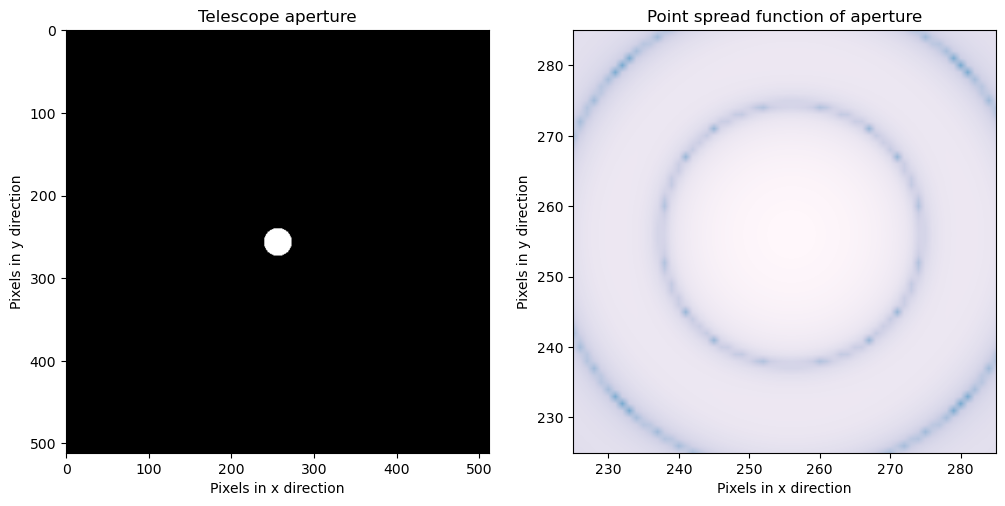

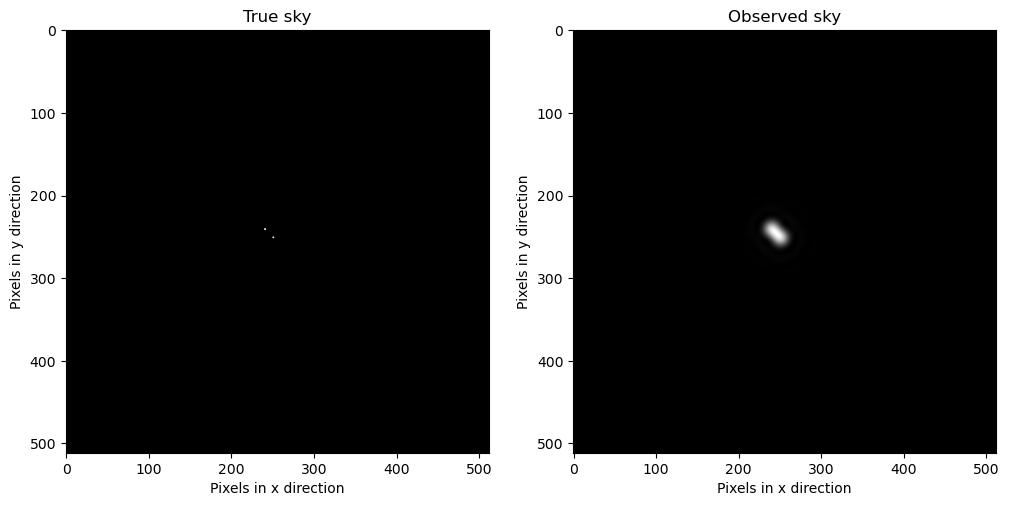

In [15]:
# We start with an empty array filled with zero's
width, height = 512, 512

# Define the center
x, y = width/2, height/2
y,x = np.ogrid[-x:x, -y:y]

"""
Open part for the student
"""
# Define the aperture
R = 512//30
aperture = np.where(x**2 + y**2 < R**2, 1, 0)

"""
end
"""

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(aperture, cmap  = 'gray', interpolation='bilinear')
plt.title("Telescope aperture")
plt.xlabel("Pixels in x direction")
plt.ylabel("Pixels in y direction")

"""
Open part for the student
"""
#calculate and plot the PSF
# PSF = np.fft.fft2(aperture)
PSF = abs(fourier_2d(aperture)) ** 2

"""
end
"""

plt.subplot(122)
plt.imshow(10*np.log10(abs(PSF)), cmap = 'PuBu_r', interpolation='bilinear')
plt.xlim([225, 285])
plt.ylim([225, 285])
plt.title("Point spread function of aperture")
plt.xlabel("Pixels in x direction")
plt.ylabel("Pixels in y direction")
plt.show()


# Define a binary system
binarysys = np.zeros((512, 512))
binarysys[240:242, 240:242] = 1
binarysys[250:252, 250:252] = 1


plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(binarysys, cmap = "gray")
plt.xlabel("Pixels in x direction")
plt.ylabel("Pixels in y direction")
plt.title("True sky")

"""
Open part for the student
"""
# Convolve the PSF with the binary system
convolved = fourier_2d(binarysys) * fourier_2d(PSF)
convolved = inverse_fourier_2d(convolved)

"""
End
"""

plt.subplot(122)
plt.imshow(abs(convolved), cmap = "gray")
plt.title("Observed sky")
plt.xlabel("Pixels in x direction")
plt.ylabel("Pixels in y direction")
plt.show()


The larger the telescope gets, the less smeared the dots are

#### 3.2.2 Interferometry
One of many examples of interferometry is in Radio Astronomy. An astronomical interferometer is an array of separate telescopes, mirror segments, or radio telescope antennas that work together as a single telescope to provide higher resolution images of astronomical objects such as stars, nebulas and galaxies by means of interferometry. The advantage of this technique is that it can theoretically produce images with the angular resolution of a huge telescope with an aperture equal to the separation between the component telescopes. The main drawback is that it does not collect as much light as the complete instrument's mirror. Thus it is mainly useful for fine resolution of more luminous astronomical objects, such as close binary stars. Another drawback is that the maximum angular size of a detectable emission source is limited by the minimum gap between detectors in the collector array. A mathematical signal processing technique called aperture synthesis is used to combine the separate signals to create high-resolution images. In Very Long Baseline Interferometry (VLBI) radio telescopes separated by thousands of kilometers are combined to form a radio interferometer with a resolution which would be given by a hypothetical single dish with an aperture thousands of kilometers in diameter. 


<b>Before</b>, we looked at the PSF of a single dish telescope. To model an interferometer, we model each receiver station as a very small telescope at a certain location (x,y). Adding more receiver stations alters our aperture function, resulting in a percieved larger telescope, and thus higher resolution. The code below generates coordinates of a ring of $n$ telescopes at a radius $r$. Telescopes are modelled as a single pixel in the aperture function. 

1. Transform the coordinates of the points to indices on a grid
2. Create an aperture function that is a single ring
3. Determine the PSF
4. Convolve the PSF with the binary system. What is the influence of $N$? And of $r$?
5. Play around with different interferometric aperture functions (can you create a filled circle, instead of a ring, for example? What about a square aperture? Or randomly placed telescopes?)

C:\Users\masla\AppData\Local\Temp\ipykernel_14424\3636600719.py:54: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(10*np.log10(abs(PSF)), cmap="PuBu_r")


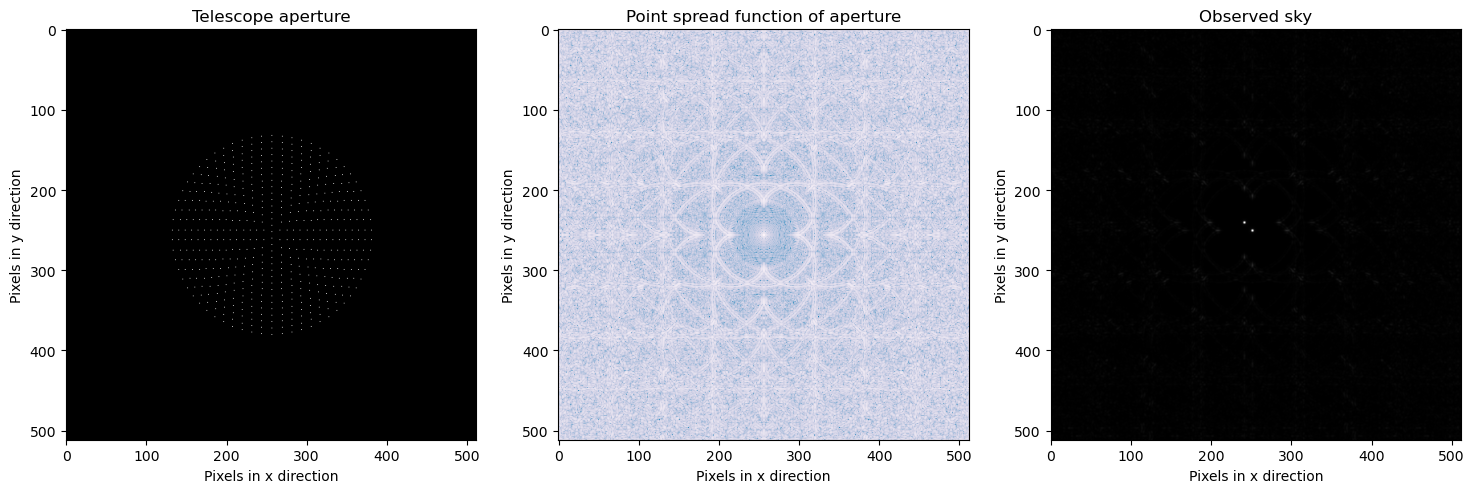

In [16]:
def circle_points(r, N):
    t = np.linspace(0, 2*np.pi, N, endpoint=False)
    x = r * np.cos(t)
    y = r * np.sin(t)

    return x, y

def coords_to_aperture(grid_x, grid_y, x, y):
    aperture = np.zeros((grid_x.size, grid_y.size), dtype=int)
    for cx, cy in zip(x, y):
        mask_x = np.argmin(np.abs(cx - grid_x))
        mask_y = np.argmin(np.abs(cy - grid_y))


        aperture[mask_x, mask_y] = 1

    return aperture


"""
Open part for the student
"""

aperture = np.zeros((512, 512))

for r in range(4, 128, 8):
    N = r//2

    x_points, y_points = circle_points(r, N)

    aperture += coords_to_aperture(x, y, x_points, y_points)

# r = width//4
# N = 28
# x_points, y_points = circle_points(r, N)
# aperture = coords_to_aperture(x, y, x_points, y_points)

PSF = abs(fourier_2d(aperture)) ** 2
convolved = fourier_2d(binarysys) * fourier_2d(PSF)
convolved = inverse_fourier_2d(convolved)

"""
end
"""
# Visualize the binary mask
plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.imshow(aperture, cmap='gray')
plt.title("Telescope aperture")
plt.xlabel("Pixels in x direction")
plt.ylabel("Pixels in y direction")

plt.subplot(132)
plt.imshow(10*np.log10(abs(PSF)), cmap="PuBu_r")
plt.title("Point spread function of aperture")
plt.xlabel("Pixels in x direction")
plt.ylabel("Pixels in y direction")

plt.subplot(133)
plt.imshow(abs(convolved), cmap="gray")
plt.title("Observed sky")
plt.xlabel("Pixels in x direction")
plt.ylabel("Pixels in y direction")
plt.show()

Increasing the ammount of telescopes makes for a better measurement, as well as decreasing the radius. I suspect it might be that the denser the telescopes are, the better the measurement.

We now turn to a real astronomical image. The code below loads and displays the image.

1. Create a grid on which you can place your aperture function. This grid should have the same size as the image!
2. Create an interferometric aperture function of your choice
3. Determine the PSF
4. Convolve the PSF with the image
5. Play around with different interferometric aperture functions

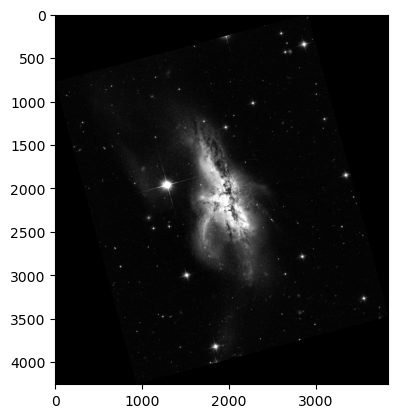

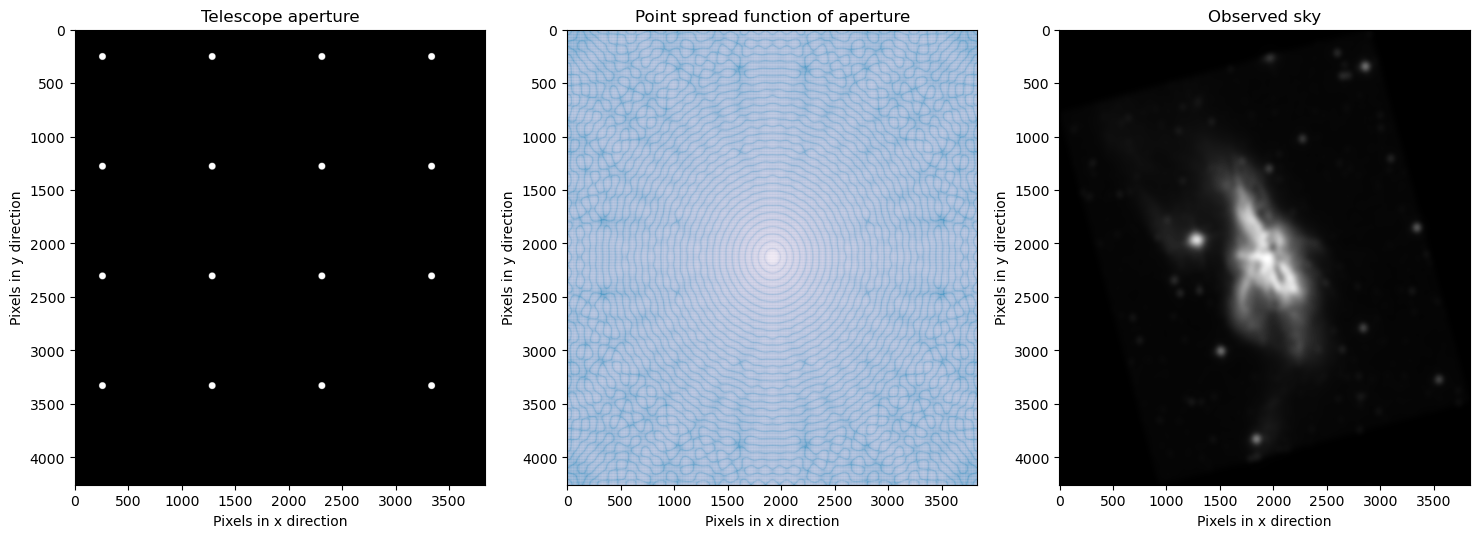

In [87]:
from PIL import Image

filename='ngc6240_optical_cube.png'
#open file
im=Image.open(filename)
im=im.convert('L') #make grayscale
imarray=np.array(im,dtype=np.uint8)
plt.imshow(imarray, cmap='gray')
plt.show()

"""
Open part for the student
"""

width, height = np.shape(imarray)

# Define the center
x, y = width//2, height//2
x, y = np.ogrid[-x:x, -y:y]

aperture = np.zeros((width, height))

for h in range((-height//2)+256, height//2, 256*4):
    for w in range((-width//2)+256, width//2, 256*4):
        aperture += np.where((x - w) **2 + (y - h)**2 < 32**2, 1, 0)
        
PSF = abs(fourier_2d(aperture)) ** 2
convolved = fourier_2d(imarray) * fourier_2d(PSF)
convolved = inverse_fourier_2d(convolved)


"""
end
"""
# Visualize the binary mask
plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.imshow(aperture, cmap='gray')
plt.title("Telescope aperture")
plt.xlabel("Pixels in x direction")
plt.ylabel("Pixels in y direction")

plt.subplot(132)
plt.imshow(10*np.log10(abs(PSF)), cmap="PuBu_r")
plt.title("Point spread function of aperture")
plt.xlabel("Pixels in x direction")
plt.ylabel("Pixels in y direction")

plt.subplot(133)
plt.imshow(abs(convolved), cmap="gray")
plt.title("Observed sky")
plt.xlabel("Pixels in x direction")
plt.ylabel("Pixels in y direction")
plt.show()